# Examen 1 - Fisica Computacional
#### Estudiante: Ignacio Vargas Cordero

### Ejercicio 1

Se tiene un oscilador armonico en dos dimensiones $(xy)$ el que la fuerza esta dado por $\vec{F}=-k\vec{r}$ y se tiene una fricción $\vec{f_{fric}}=-\gamma \vec{v}$ si $|\vec{v}|\leq1$, pero cuando $|\vec{v}|>1$ la fricción es $\vec{f_{fricc}}=-\mu v^{3/2}\hat{v}$. Si $m=1$, $\gamma=0.1$ y $\mu=0.2$, resuelva los siguientes ejercicios:

(a) Encuentre las ecuaciones de movimiento en coordenadas cartesianas y polares.

(b) Utilice el método de Runge-Kutta de 4to orden para encontrar la solución a las ecuaciones de
movimiento en el inciso anterior con condiciones iniciales $\vec{r_0}=(0,1)$ y $\vec{v_0}=(cos\theta,sin\theta)$, donde $\theta=\frac{n\pi}{6}$ con $n=0,1,2,3,...,10,11$.

(c) La energía para las distintas condiciones iniciales y detenga la simulación cuando ésta sea menor al $1\%$ de su valor inicial.

(d) Dibuje las gráficas del momento angular para los casos anteriores.

(e) Tome de manera arbitraria alguna condición inicial y dibuje el espacio fase $(p_x,x)$ y $(p_\rho,\rho)$

In [1]:
from pylab import *
%matplotlib inline

In [2]:
#Ecuacion de Movimiento en Coordenadas Cartesianas
#pos guarda la posicion y sus derivadas. pos = [x, y, x', y']

def mov_c(pos, t, m=1., gamma=0.1, mu=0.2, k=1.):
    #pos[0] y pos[1] son las posiciones
    #pos[2] y pos[3] son las velocidades
    x, y, dx, dy = pos[0], pos[1], pos[2], pos[3]
    norma_velocidad = sqrt(dx*dx + dy*dy)
    
    if norma_velocidad <= 1:
        ddx = -(k/m)*x - (gamma/m)*dx
        ddy = -(k/m)*y- (gamma/m)*dy
    else:
        ddx = -(k/m)*x - (mu/m)*sqrt(norma_velocidad)*dx
        ddy = -(k/m)*y -  (mu/m)*sqrt(norma_velocidad)*dy
    return array([dx,dy,ddx,ddy])

#Ecuacion de Movimiento en Coordenadas Polares
#pos guarda la posicion y sus derivadas. pos = [r, theta, r', theta']

def mov_p(pos, t, m=1., gamma=0.1, mu=0.2, k=1.):
    #r[0] y r[1] son las posiciones
    #r[2] y r[3] son las velocidades
    r, theta, dr, dtheta = pos[0], pos[1], pos[2], pos[3]
    norma_velocidad = sqrt(dr*dr + (r*dtheta)*(r*dtheta))
    
    if r != 0:
        if norma_velocidad <= 1:
            ddr = (dtheta*dtheta-(k/m))*r - (gamma/m)*dr
            ddtheta = -(2*(dr/r)+(gamma/m))*dtheta
        else:
            ddr = (dtheta*dtheta-(k/m))*r - (mu/m)*sqrt(norma_velocidad)*dr
            ddtheta = -(2*(dr/r)+(gamma/m)*sqrt(norma_velocidad))*dtheta
    else:
        if norma_velocidad <=1:
            ddr = (dtheta*dtheta-(k/m))*r - (gamma/m)*dr
            ddtheta = 0
        else:
            ddr = (dtheta*dtheta-(k/m))*r - (mu/m)*sqrt(norma_velocidad)*dr
            ddtheta = 0
            
    return array([dr,dtheta,ddr,ddtheta])

In [3]:
def Energia(x):
    return 0.5*(x[2]*x[2]+x[3]*x[3]) + 0.5*0[1]*(x[0]*x[0]+x[1]*x[1])

In [4]:
#Metodo de Runge-Kutta de 4to Orden
def rk4(ecuacion, punto_inicial, intervalo, argumentos=0, h=0.1):
    if (intervalo[1]-intervalo[0]) <= 5.*h:
        h = (intervalo[1]-intervalo[0])/10
    tiempos = arange(intervalo[0], intervalo[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    
    #Modificacion a rk4 para que la simulacion se detenga cuando energia sea menor a 1% inicial
#     E0=Energia(punto_inicial)

    if argumentos == 0:
        for i in xrange(len(tiempos)-1):
            k1 = ecuacion(solucion[i,:], tiempos[i])
            k2 = ecuacion(solucion[i,:]+0.5*h*k1, tiempos[i]+0.5*h)
            k3 = ecuacion(solucion[i,:]+0.5*h*k2, tiempos[i]+0.5*h)
            k4 = ecuacion(solucion[i,:]+h*k3, tiempos[i]+h)
            solucion[i+1,:] = solucion[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
            
#             En = Energia(sol[i+1,:])
#             if Energia < E0*0.01:
#                 tiempos = tiempos[:i]
#                 solucion = solucion[:i, :]
#                 return tiempos, solucion
        
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ecuacion(solucion[i,:], tiempos[i], argumentos)
            k2 = ecuacion(solucion[i,:]+0.5*h*k1, tiempos[i]+0.5*h, argumentos)
            k3 = ecuacion(solucion[i,:]+0.5*h*k2, tiempos[i]+0.5*h, argumentos)
            k4 = ecuacion(solucion[i,:]+h*k3, tiempos[i]+h, argumentos)
            solucion[i+1,:] = solucion[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
        
#             En = Energia(sol[i+1,:])
#             if Energia < E0*0.01:
#                 tiempos = tiempos[:i]
#                 solucion = solucion[:i, :]
#                 return tiempos, solucion
        
    return tiempos, solucion

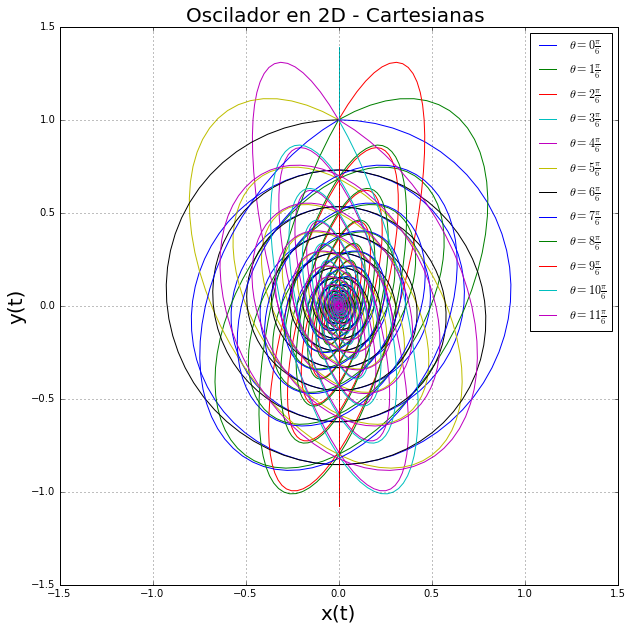

In [5]:
#Solucion a ecuacion de movimiento en cartesianas con condiciones iniciales
#r0=(0,1),
#v0=(cos(theta),sin(theta))
#donde theta=(n*pi/6) con n=0,1,2,3...10,11.

fig, ax = subplots(figsize=(10,10))
grid(True)
title(r'Oscilador en 2D - Cartesianas ',fontsize = 20),xlabel('x(t)',fontsize=20),ylabel('y(t)',fontsize = 20)
N = 100

theta = [n*pi/6. for n in range(12)]
for i in range(len(theta)):
    inicio = array([0, 1, cos(theta[i]), sin(theta[i])])
    t, sol = rk4(mov_c, inicio, [0,N])
    plot(sol[:,0], sol[:,1], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    
ax.set_aspect('equal', 'datalim')
ax.legend()
show()

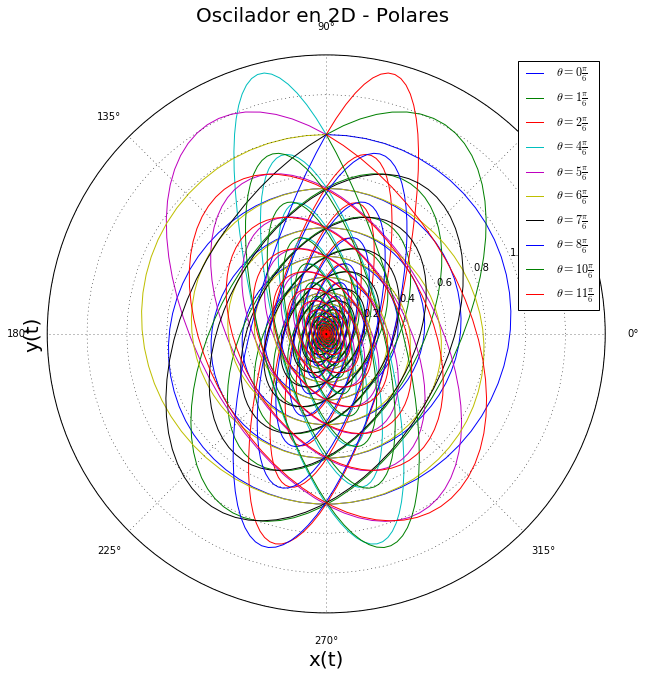

In [6]:
#Solucion a ecuacion de movimiento en polares con condiciones iniciales
#r0=(0,1),
#v0=(cos(theta),sin(theta))
#donde theta=(n*pi/6) con n=0,1,2,3...10,11.

fig = figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='polar')
grid(True)
title(r'Oscilador en 2D - Polares ',fontsize = 20),xlabel('x(t)',fontsize=20),ylabel('y(t)',fontsize = 20)
N = 100

theta = [n*pi/6. for n in range(12)]
for i in range(len(theta)):
    if abs(theta[i]%pi) != pi/2:
        inicio = array([1., pi/2., sin(theta[i]), -cos(theta[i])])
        t, sol = rk4(mov_p, inicio, [0,N])
        plot(sol[:,1], sol[:,0], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
ax.legend()
show()

In [9]:
#Energia para distintas condiciones iniciales (deteniendo cuando sea menor
#a 1% de valor inic.

def fuerza(x_v,t,k =1 , gamma = .1, mu=.2):
    x, y, vx, vy = x_v[:,0],x_v[:,1],x_v[:,2],x_v[:,3]
    norm_vel = sqrt(vx**2+vy**2)
    if norm_vel <= 1:
        Fx = -(k)*x - (gamma)*vx
        Fy = -(k)*y - (gamma)*vy
    else:
        Fx = -(k)*x - (mu)*sqrt(norm_vel)*vx
        Fy = -(k)*y -  (mu)*sqrt(norm_vel)*vy
    return array([Fx,Fy])

def Energia(x_p,k =1.):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E = 0.5*(px*px* + py*py) + 0.5*k* (x*x + y*y)
    return E

def L_z(x_p):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    L = x*py - y*px
    return L

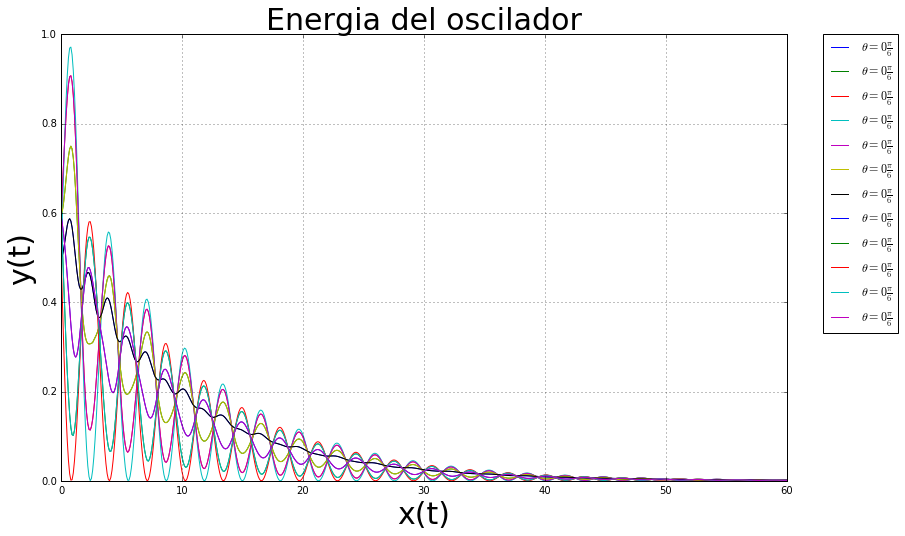

In [12]:
ang = arange(0,12,1)*pi/6
t_f = 60

fig, ax = plt.subplots(figsize=(13, 8))
grid(True)
title(r'Energia del oscilador',fontsize = 30),xlabel('x(t)',fontsize=30),ylabel('y(t)',fontsize = 30)
for a in ang:
    cond_ini = [0,1,cos(a),sin(a)]
    t_c, sol_c = rk4(mov_c, cond_ini, [0,t_f])
    E = Energia(sol_c)
    plot(t_c, E, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

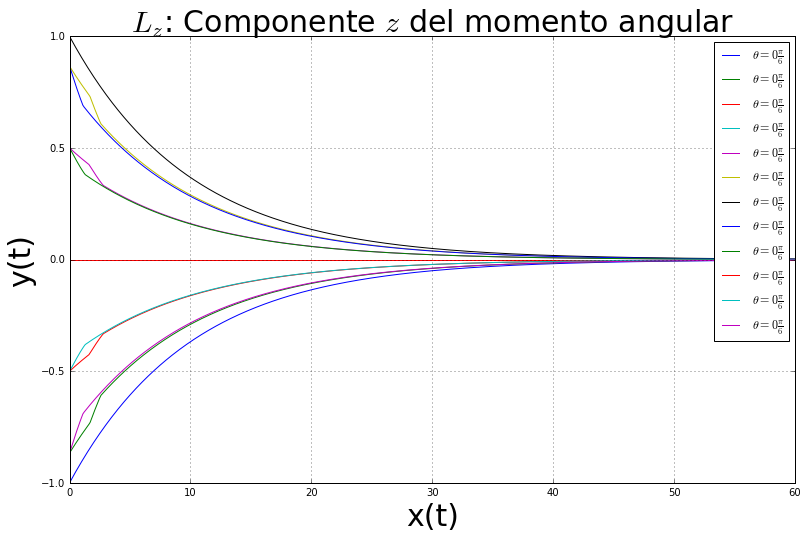

In [10]:
#Momento angular en funcion del tiempo

ang = arange(0,12,1)*pi/6
t_f = 60

fig, ax = plt.subplots(figsize=(13, 8))
grid(True)
title(r'$L_z$: Componente $z$ del momento angular',fontsize = 30),xlabel('x(t)',fontsize=30),ylabel('y(t)',fontsize = 30)
for a in ang:
    cond_ini = [0,1,cos(a),sin(a)]
    t_c, sol_c = rk4(mov_c, cond_ini, [0,t_f])
    L = L_z(sol_c)
    plot(t_c, L, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
ax.legend()
show()

In [ ]:
# fig = figure(figsize=(14,7))
# ax = fig.add_subplot(121)
# bx = fig.add_subplot(122)

# theta = [n*pi/6. for n in range(12)]
# N = 70
# for i in range(len(theta)):
#     cond_ini = array([0, 1, cos(theta[i]), sin(theta[i])])
#     tiempo, sol = rk4(mov_c, cond_ini, [0,N])
#     # Se grafica la energia en funcion del tiempo
#     Energies = zeros_like(tiempo)
#     for n in range(len(tiempo)): Energies[n] = Energia(sol[n,:])
#     ax.plot(tiempo, Energies, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
#     ax.set_xlabel("Tiempo", fontsize=20); bx.set_ylabel("$E/E_0$", fontsize=20)
#     ax.set_title(u"Energía en función del tiempo", fontsize=20)
#     ax.legend()
    
    # Se grafica el momento angular en funcion del tiempo
#     Mom_angular = zeros_like(tiempo)
#     for n in range(len(tiempo)): 
#         Mom_angular[n] = sqrt(sol[n,0]*sol[n,0]+sol[n,1]*sol[n,1])*
#     bx.plot(tiempo, Mom_angular, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
#     bx.set_xlabel("Tiempo", fontsize=20); bx.set_ylabel("$L$", fontsize=20)
#     bx.set_title(u"Momengo angular en función del tiempo", fontsize=20)
#     bx.legend()

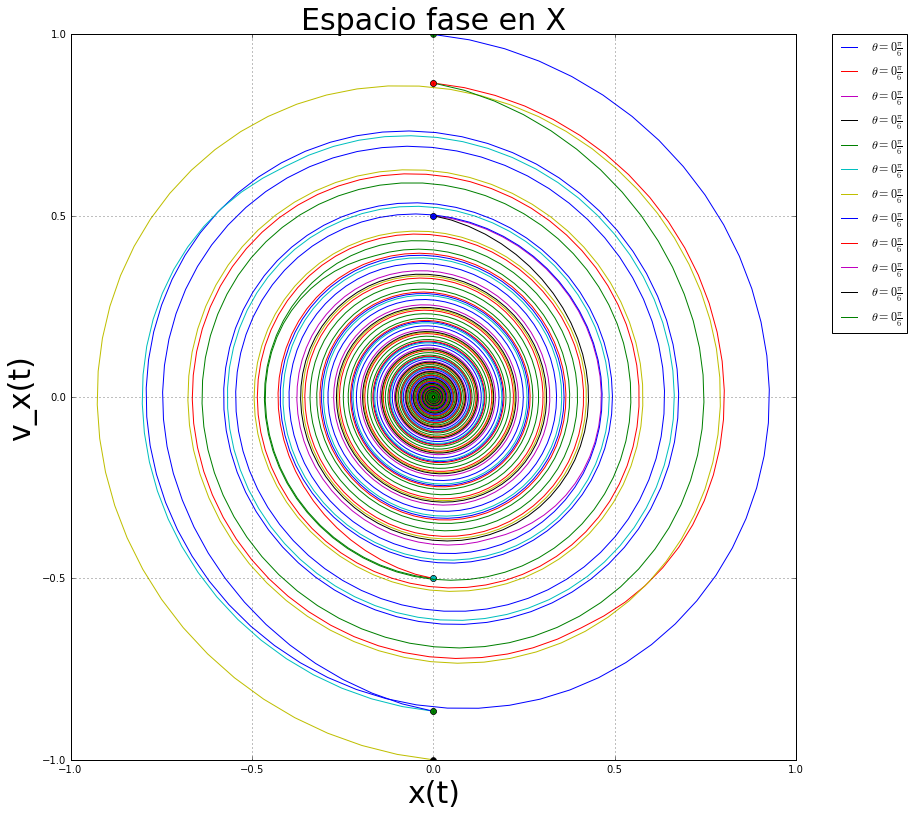

In [15]:
#Condicion inicial arbitraria, dibujar espacio fase en x,x'

ang = arange(0,12,1)*pi/6
t_f = 100

fig, ax = plt.subplots(figsize=(13, 13))
grid(True)
title(r'Espacio fase en X',fontsize = 30),xlabel('x(t)',fontsize=30),ylabel('v_x(t)',fontsize = 30)
for a in ang:
    cond_ini = [0,1,cos(a),sin(a)]
    t_c, sol_c = rk4(mov_c, cond_ini, [0,t_f])
    plot(sol_c[:,0], sol_c[:,2], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    plot(0,cos(a),'o')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

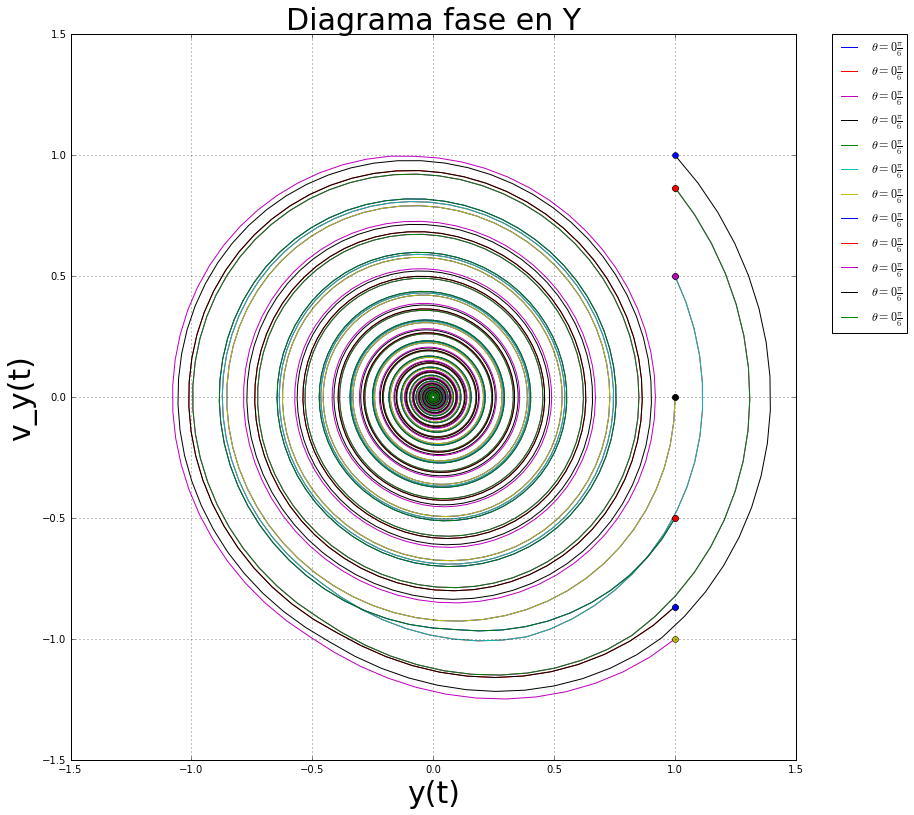

In [16]:
#Condicion inicial arbitraria, dibujar espacio fase en y,y'

ang = arange(0,12,1)*pi/6
t_f = 100

fig, ax = plt.subplots(figsize=(13, 13))
grid(True)
title(r'Diagrama fase en Y',fontsize = 30),xlabel('y(t)',fontsize=30),ylabel('v_y(t)',fontsize = 30)
for a in ang:
    cond_ini = [0,1,cos(a),sin(a)]
    t_c, sol_c = rk4(mov_c, cond_ini, [0,t_f])
    plot(sol_c[:,1], sol_c[:,3], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    plot(1,sin(a),'o')
xlim (-1.5,1.5), ylim(-1.5,1.5)  
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

### Ejercicio 2

Suponga que se tiene el sistema como en el problema anterior, pero ahora la partícula tiene carga $q > 0$ y en el origen también se encuentra una partícula de carga $q > 0$.

$(a)$ Sin considerar la fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación).

$(b)$ Considerando friccion, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación).

### Ejercicio 3 (falta agregar incisos nuevos)

Se tiene una partícula de masa $m = 1$ en un campo gravitacional$\vec{g} = −9.8\hat{j}$ en una caja como se con $L=10m$ y $d=3m$. Realice los ejercicios con valores de $\alpha=\frac{\pi}{6}$ y $\alpha=\frac{\pi}{10}$.

$(a)$ Realice una simulación con condición inicial tal que la posición inicial es sobre la rampa a un
tercio de la distancia de la pared vertical izquierda y el vértice inferior de la caja, y se dispara
con velocidad $|\vec{v}| = 1$ hacia la derecha con ángulos sobre la horizontal $\alpha$, $2\alpha$ y $3\alpha$. (Para que la simulación sea válida, la partícula debe rebotar al menos 20 con alguna parte de la caja).

$(b)$ Introduzca algún modelo de fricción y compare las trayectorias con el inciso anterior.

$(c)$ Dibuje el espacio fase $p_x$,$x$ y $p_y$,$y$ cuando no hay fricción y la partícula es lanzada hacia la derecha a un ángulo $\alpha$ y vertical hacia arriba. Tome en cuenta el nuúmero necesario de rebotes para que la simulación pueda barrer el espacio fase de manera representativa.

### Ejercicio 4 (falta agregar incisos nuevos)

Se tiene una partícula de masa $m = 1$ en una caja circular. Los radios de $a$ y $b$ son tales que $b = 2a$.

$(a)$ Realice una simulación en donde la partícula realiza varios rebotes en las paredes de la caja.
Suponga condiciones iniciales arbitrarias que le permitan hacer lo anterior.

$(b)$ ¿Existen condiciones iniciales que hagan que la partícula quede encasillada en sólo un sector de la caja?. De ser así muestre cuales son tales condiciones o demuestre porque no se pueden obtener dicha situación.

$(c)$ Si ahora se tiene un campo gravitacional uniforme $\vec{g} = 10\hat{n}$. Que condiciones iniciales se tendrían que cumplir para que la partícula sólo pueda ocupar la mitad de la dona.